<Figure size 432x288 with 0 Axes>

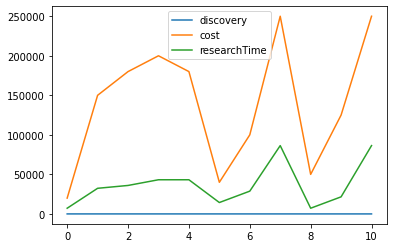

,discovery,cost,researchTime
0,6,20000,7200
1,8,150000,32400
2,9,180000,36000
3,10,200000,43200
4,7,180000,43200
5,3,40000,14400
6,4,100000,28800
7,5,250000,86400
8,0,50000,7200
9,1,125000,21600


In [18]:
from matplotlib import pyplot as plt
import pandas as pd
import requests, json
%matplotlib inline

url = requests.get("http://localhost:3000/api/gamedata")
data = json.loads(url.text)

nodes = []

unvisited = []
for track in data['researchTracks']:
    unvisited.append(track['rootNode'])
    
while len(unvisited) > 0:
    node = unvisited.pop()
    data = {k: node.get(k, 0) for k in ('discovery', 'cost', 'researchTime')}
    nodes.append(data)
    if 'nodes' in node:
        for n in node['nodes']:
            unvisited.append(n)
    
df = pd.DataFrame(nodes)


plt.figure()
df.plot(legend=True)
plt.show()

df